# Baseline model
Model pour s'habituer au dataset

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#pip install pandas-profiling
import pandas_profiling
import matplotlib.pyplot as plt
# pip install scikit-plot
import scikitplot as skplt
#pip install missingno
import missingno as msno
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

#pip install xgboost
import xgboost as xgb
#pip install lightgbm
import lightgbm as lgb

pd.options.display.max_columns = 99

On importe les dataset

In [4]:
# data_application_test = pd.read_csv('../data/application_test.csv')
data_application_train = pd.read_csv('../data/application_train.csv')
# data_bureau_balance = pd.read_csv('../data/bureau_balance.csv')
data_credit_card_balance  = pd.read_csv('../data/credit_card_balance.csv')
data_bureau = pd.read_csv('../data/bureau.csv')
# data_installments_payments = pd.read_csv('../data/installments_payments.csv')
data_POS_CASH_balance = pd.read_csv('../data/POS_CASH_balance.csv')
# data_previous_application = pd.read_csv('../data/previous_application.csv')
# data_HomeCredit_columns_description = pd.read_csv('../data/HomeCredit_columns_description.csv')
data_sample_submission = pd.read_csv('../data/sample_submission.csv')

On nettoie le nom des colonnes car, c'est pénible de manipuler les noms avec des majuscules

In [5]:
data_application_train.columns = [str.lower(x) for x in data_application_train.columns]
# data_application_test.columns = [str.lower(x) for x in data_application_test.columns]
data_POS_CASH_balance.columns = [str.lower(x) for x in data_POS_CASH_balance.columns]
data_bureau.columns = [str.lower(x) for x in data_bureau.columns]
data_credit_card_balance.columns = [str.lower(x) for x in data_credit_card_balance.columns]

In [6]:
data_application_train.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,...,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,...,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,...,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN

In [7]:
data_credit_card_balance.head()

,sk_id_prev,sk_id_curr,months_balance,amt_balance,amt_credit_limit_actual,amt_drawings_atm_current,amt_drawings_current,amt_drawings_other_current,amt_drawings_pos_current,amt_inst_min_regularity,amt_payment_current,amt_payment_total_current,amt_receivable_principal,amt_recivable,amt_total_receivable,cnt_drawings_atm_current,cnt_drawings_current,cnt_drawings_other_current,cnt_drawings_pos_current,cnt_instalment_mature_cum,name_contract_status,sk_dpd,sk_dpd_def
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [8]:
data_POS_CASH_balance.head()

,sk_id_prev,sk_id_curr,months_balance,cnt_instalment,cnt_instalment_future,name_contract_status,sk_dpd,sk_dpd_def
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


Aggrégation des autres dataset. On utilise des variables descriptives.

In [9]:
data_POS_CASH_balance.drop('sk_id_prev',axis=1,inplace=True)
cash = data_POS_CASH_balance.groupby('sk_id_curr').agg(['min','max','mean','std','median','count','sum'])
#On supprime les multi index, et on ajoute un préfixe pour mieux identifier les variables
cash.columns = ["_".join(x) for x in cash.columns.ravel()]
cash.columns = [ 'cash_' + x for x in cash.columns]
del(data_POS_CASH_balance)

In [10]:
bureau = data_bureau.groupby('sk_id_curr')[['sk_id_bureau']].count().rename(columns={'sk_id_bureau':'sk_id_bureau_count'})
bureau.columns = [ 'bureau_' + x for x in bureau.columns]
del(data_bureau)

In [11]:
card_credit = data_credit_card_balance.groupby('sk_id_curr').agg(['min','max','mean','std','median','count','sum'])
card_credit.columns = ["_".join(x) for x in card_credit.columns.ravel()]
card_credit.columns = [ 'card_credit_' + x for x in card_credit.columns]
del(data_credit_card_balance)

Join

In [12]:
data_train = data_application_train.set_index('sk_id_curr').join(cash,how='left')
data_train = data_train.join(bureau,how='left')
data_train = data_train.join(card_credit,how='left')
del(cash)
del(bureau)
del(card_credit)

### Analyse 

In [13]:
# profile = pandas_profiling.ProfileReport(data_application_train)
# profile

On essaye d'avoir le max de features au début, un trie sera nécéssair par la suite. 250 features environ sans compter les autres dataset !

## Data cleaning

Très simple on transforme toutes les variables qualitatives en variables booléenne.

In [14]:
# data = data_application_train.copy()
# rejected_variables = profile.get_rejected_variables()
# data = data.drop(rejected_variables,axis=1)

In [15]:
data_cleaned = pd.get_dummies(data_train)
data_cleaned = data_cleaned.fillna(0)
data_cleaned = data_cleaned.reset_index()

In [16]:
data_cleaned.head()

,sk_id_curr,target,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,...,organization_type_Industry: type 8,organization_type_Industry: type 9,organization_type_Insurance,organization_type_Kindergarten,organization_type_Legal Services,organization_type_Medicine,organization_type_Military,organization_type_Mobile,organization_type_Other,organization_type_Police,organization_type_Postal,organization_type_Realtor,organization_type_Religion,organization_type_Restaurant,organization_type_School,organization_type_Security,organization_type_Security Ministries,organization_type_Self-employed,organization_type_Services,organization_type_Telecom,organization_type_Trade: type 1,organization_type_Trade: type 2,organization_type_Trade: type 3,organization_type_Trade: type 4,organization_type_Trade: type 5,organization_type_Trade: type 6,organization_type_Trade: type 7,organization_type_Transport: type 1,organization_type_Transport: type 2,organization_type_Transport: type 3,organization_type_Transport: type 4,organization_type_University,organization_type_XNA,fondkapremont_mode_not specified,fondkapremont_mode_org spec account,fondkapremont_mode_reg oper account,fondkapremont_mode_reg oper spec account,housetype_mode_block of flats,housetype_mode_specific housing,housetype_mode_terraced house,wallsmaterial_mode_Block,wallsmaterial_mode_Mixed,wallsmaterial_mode_Monolithic,wallsmaterial_mode_Others,wallsmaterial_mode_Panel,"wallsmaterial_mode_Stone, brick",wallsmaterial_mode_Wooden,emergencystate_mode_No,emergencystate_mode_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,0.0,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,0.0,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,0.000000,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.000000,0.555912,0.729567,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,0.0,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.000000,0.650442,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,0.0,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.000000,0.322738,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.000

### Feature Selection
Chris Albon

Seuil à modifier si besoin. Pour l'instant le suppression des variables sembles baisser les perf du modèle

In [17]:
# corr_matrix = data_cleaned.corr().abs()
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [18]:
# data_cleaned.drop(columns=to_drop,axis=1,inplace=True)

## Modèle

Regression logistique pour commencer.  
Les prochain modèles à tester seront :
- Xgboost
- LightGBM

In [19]:
target = data_cleaned.target
#On drop l'ID mais je n'ai pas vérifier s'il influe sur le résultat
data_cleaned = data_cleaned.drop(['sk_id_curr','target'],axis=1)
col = data_cleaned.columns

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_train = scaler.fit_transform(data_cleaned)
data_train = pd.DataFrame(data_train)
data_train.columns = col

In [21]:
data_train.head()

,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,...,organization_type_Industry: type 8,organization_type_Industry: type 9,organization_type_Insurance,organization_type_Kindergarten,organization_type_Legal Services,organization_type_Medicine,organization_type_Military,organization_type_Mobile,organization_type_Other,organization_type_Police,organization_type_Postal,organization_type_Realtor,organization_type_Religion,organization_type_Restaurant,organization_type_School,organization_type_Security,organization_type_Security Ministries,organization_type_Self-employed,organization_type_Services,organization_type_Telecom,organization_type_Trade: type 1,organization_type_Trade: type 2,organization_type_Trade: type 3,organization_type_Trade: type 4,organization_type_Trade: type 5,organization_type_Trade: type 6,organization_type_Trade: type 7,organization_type_Transport: type 1,organization_type_Transport: type 2,organization_type_Transport: type 3,organization_type_Transport: type 4,organization_type_University,organization_type_XNA,fondkapremont_mode_not specified,fondkapremont_mode_org spec account,fondkapremont_mode_reg oper account,fondkapremont_mode_reg oper spec account,housetype_mode_block of flats,housetype_mode_specific housing,housetype_mode_terraced house,wallsmaterial_mode_Block,wallsmaterial_mode_Mixed,wallsmaterial_mode_Monolithic,wallsmaterial_mode_Others,wallsmaterial_mode_Panel,"wallsmaterial_mode_Stone, brick",wallsmaterial_mode_Wooden,emergencystate_mode_No,emergencystate_mode_Yes
0,-0.577538,0.142129,-0.478095,-0.166065,-0.505662,-0.149452,1.506880,-0.456215,0.379837,0.579154,-0.455284,0.001803,0.468697,-0.499013,0.043245,1.599337,-0.245215,-1.265685,-0.103064,-0.062699,-0.631821,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.476522,-1.301593,-1.007542,-0.345180,0.003066,0.960978,1.016443,0.018432,-0.368513,-0.051932,-0.198993,0.355764,0.162782,-0.166853,-0.364140,-0.100846,-0.261343,-0.327407,0.028603,0.961652,1.042389,0.034883,...,-0.008835,-0.105232,-0.044104,-0.151279,-0.031509,-0.194354,-0.092949,-0.032124,-0.239507,-0.087585,-0.084047,-0.035908,-0.016628,-0.076968,-0.172570,-0.103304,-0.080379,-0.377813,-0.071751,-0.043358,-0.033659,-0.078848,-0.107173,-0.014428,-0.012624,-0.045345,-0.161651,-0.025575,-0.084964,-0.062249,-0.133669,-0.065833,-0.468635,-0.137267,-0.136428,1.779079,-0.202211,1.021382,-0.069989,-0.062904,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,1.935056,-0.133215,0.963763,-0.08734
1,-0.577538,0.426792,1.725450,0.592710,1.600480,-1.252750,-0.166821,-0.460115,1.078697,1.790855,-0.455284,0.001803,0.468697,-0.499013,0.043245,1.599337,-0.245215,-0.167621,-2.067573,-2.051813,-0.325620,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,0.323239,0.566501,-1.527258,0.396431,0.236003,0.987275,1.505968,1.012286,0.431106,-0.387436,1.165958,1.824859,-0.228092,0.648129,0.014866,0.045223,-0.059838,0.380977,0.252119,0.987948,1.508933,0.814370,...,-0.008835,-0.105232,-0.044104,-0.151279,-0.031509,-0.194354,-0.092949,-0.032124,-0.239507,-0.087585,-0.084047,-0.035908,-0.016628,-0.076968,5.794739,-0.103304,-0.080379,-0.377813,-0.071751,-0.043358,-0.033659,-0.078848,-0.107173,-0.014

Split du dataset d'entrainement. Un set de validation sera crée par la suite

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data_train, target, test_size=0.4, random_state=1)

Baseline LogReg

In [23]:
regleg = LogisticRegression()
pred = regleg.fit(X_train,y_train).predict_proba(X_test)

In [24]:
print(roc_auc_score(y_test, pred[:,1]))
# print(cross_val_score(LogisticRegression(),X_train,y_train,cv = 5,scoring='roc_auc'))

0.7516889472271198


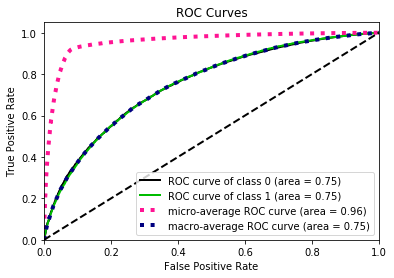

In [25]:
skplt.metrics.plot_roc(y_test, pred)

Models

In [26]:
xgbb = xgb.XGBClassifier()
prediction_xgb = xgbb.fit(X_train,y_train).predict_proba(X_test)
print(roc_auc_score(y_test, prediction_xgb[:,1]))
# print(cross_val_score(xgb.XGBClassifier(),X_train,y_train,cv = 15,scoring='roc_auc'))

0.7632190572033393


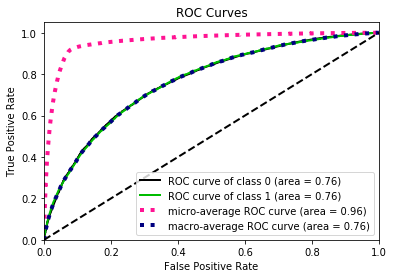

In [27]:
skplt.metrics.plot_roc(y_test, prediction_xgb)

In [28]:
lightgbm = lgb.LGBMClassifier()
prediction_lgb = lightgbm.fit(X_train,y_train).predict_proba(X_test)
print(roc_auc_score(y_test, pred[:,1]))
# print(cross_val_score(lgb.LGBMClassifier(),X_train,y_train,cv = 15,scoring='roc_auc'))

0.7516889472271198


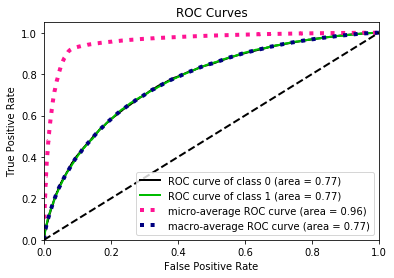

In [29]:
skplt.metrics.plot_roc(y_test, prediction_lgb)

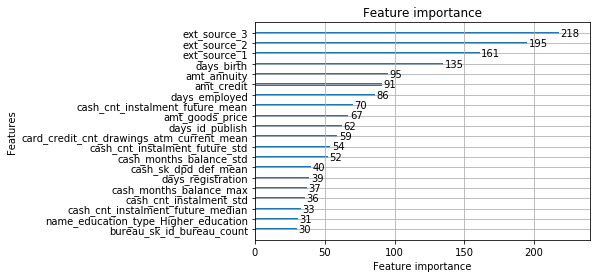

In [30]:
lgb.plot_importance(lightgbm,max_num_features=20)

## Submission  
Il manque des occurence pour le dataset test. On rajoute donc les colonnes du dataset d'entrainement dans celui du test.

In [31]:
# test = pd.get_dummies(data_application_test) 

In [32]:
# # a = np.setdiff1d(app_train.columns, test.columns)
# missing_cols = set( data_train.columns ) - set( test.columns )

In [33]:
# # test['code_gender_XNA'] = 0
# # test['name_family_status_Unknown'] = 0
# # test['name_income_type_Maternity leave'] = 0
# for c in missing_cols:
#     test[c] = 0
# test = test[data_train.columns]

In [34]:
# test.fillna(0,inplace=True)
# #test.drop('sk_id_curr',axis=1,inplace=True)
# c_test = test.columns
# test = scaler.fit_transform(test)
# test = pd.DataFrame(test)
# test.columns = c_test

In [35]:
# prediction = xgbb.predict_proba(test)

In [36]:
# data_sample_submission['TARGET'] = prediction[:,1]

In [37]:
# data_sample_submission.to_csv('xgbv1.csv',index=False)